<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Árboles de decisión, reglas y ensemble learning</header1></left>

## Importación de librerias necesarias

In [1]:
#Se importarán las siguientes librerías:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install numpy
#!pip install scikit-learn
#!pip install pydotplus
#!pip install graphviz
#!pip install python-weka-wrapper3


In [2]:
#Nota: el archivo incluye más librerías de las necesarias, que estarán identadas
#from pandas.plotting import scatter_matrix
#from sklearn import tree
#import matplotlib.pyplot as plt
#import matplotlib.image as pltimg
#import seaborn as sns
#import pydotplus
#from sklearn.model_selection import StratifiedKFold


import pandas as pd
from pandas import read_csv

import numpy as np
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder



## Cargar el Dataset

El dataset se ha obtenido de Kaggle mediante el siguiente enlace

https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set?utm_source=chatgpt.com

In [3]:
#Código para cargar el Dataset

data= pd.read_csv('data.csv')




In [4]:
# Comprobamos que todo está bien
print(data.head(5))


  buying maintenance doors person lug_boot safety  class
0  vhigh       vhigh     2      2    small    low  unacc
1  vhigh       vhigh     2      2    small    med  unacc
2  vhigh       vhigh     2      2    small   high  unacc
3  vhigh       vhigh     2      2      med    low  unacc
4  vhigh       vhigh     2      2      med    med  unacc


Observando los datos, el problema consiste en determinar si la compra de un vehículo es recomendable o no (es decir, una variable con valores discretos) dependiendo de una serie de características como pueden ser el tamaño del maletero, el número de puertas o la seguridad que proporciona. Por lo tanto, el problema será de aprendizaje supervisado. Más adelante especificaremos las técnicas que utilizaremos.

Basandonos en el problema, nuestra variable objetivo será la columna class y por lo tanto, las variables de entrada serán el resto de atributos.

La solución para este problema sería encontrar un modelo de predicción que, dados unos atributos de un coche sea capaz de realizar la clasificación correctamente de la calidad del mismo. Gracias a este modelo, podríamos saber exactamente que coche si un coche es recomendable para su compra, debido a que es necesario hacer un buen desembolso de dinero para comprar un automóvil.

## Caracterización del Dataset


In [5]:
#Código que responde a la descripción anterior

#Numero de filas y columnas del dataset
print('El numero de filas y columnas es: ', data.shape)
print('\n')

#Registros por cada columna
print('Numero de registros por atributo')
print(data.count())
print('\n')


#Registros nulos o desconocidos por atributo
print('Numero de registros nulos por atributo')
print(data.info())
print('\n')

#Valores de que encontramos en cada clase, para ello debemos realizar una funcion que nos
#devuelva el valor único de cada columna

def tiposUnicosPorAtributo(dataColumns):
    for column in dataColumns:
        print('Valores únicos de la columna: ', column, '\n', data[column].unique())
        print('\n')
        print('Frecuencia de cada valor único de: ',data[column].value_counts())
        print('###########################################')
tiposUnicosPorAtributo(data.columns)


El numero de filas y columnas es:  (1750, 7)


Numero de registros por atributo
buying         1750
maintenance    1750
doors          1750
person         1750
lug_boot       1750
safety         1750
class          1750
dtype: int64


Numero de registros nulos por atributo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1750 non-null   object
 1   maintenance  1750 non-null   object
 2   doors        1750 non-null   object
 3   person       1750 non-null   object
 4   lug_boot     1750 non-null   object
 5   safety       1750 non-null   object
 6   class        1750 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB
None


Valores únicos de la columna:  buying 
 ['vhigh' 'high' 'med' 'low']


Frecuencia de cada valor único de:  buying
vhigh    443
med      438
low      437
high     432
Name: count, dtype: int64
###########

Histograma que muestra la cantidad de coches de cada calidad


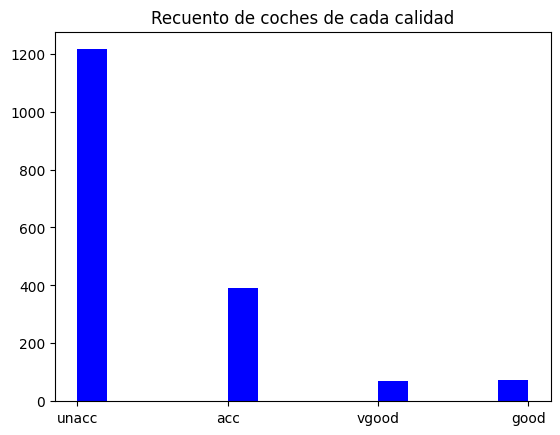

In [6]:
#Renombramos la variable class con clas para que no de problema con la función que tiene el mismo nombre
data.rename(columns={"class": "clas"}, inplace=True)
#Vamos a hacer un histograma de la variable class por ser la más importante
print('Histograma que muestra la cantidad de coches de cada calidad')
data.clas.hist(bins=15, grid=False, color="blue").set_title("Recuento de coches de cada calidad")
pyplot.show()


En un par de párrafos haga un resumen de los principales hallazagos encontrados: 
- El dataset proporcionado se compone de las siguientes variables
    - **buying:** La variable indica el valor del coche mediante una cadena de texto. Variable cualitativa ordinal
    - **maintenance:** Indica el grado de mantenimiento del coche mediante una cadena de texto. Variable cualitativa ordinal
    - **doors:** Es el número de puertas del vehículo. Variable cuantitativa discreta
    - **person:** Número de personas que pueden ir en el coche. Variable cuantitativa discreta
    - **lug_boot:** Variable referida al tamaño del maletero. Variable cualitativa ordinal
    - **safety:** Nivel de seguridad del coche. Variable cualitativa ordinal
    - **class:** Valoración del vehículo teniendo en cuenta las anteriores variables del dataset. Variable cualitativa ordinal

- El dataset se conforma con los siguientes datos:
    - **Número de filas:** 1750.
    - **Número de campos / columnas:** 7.
    - **Número de datos nulos:** 0.
    - **La variable objetivo toma 4 valores únicos:** unacc, acc, vgood, good.

- La variable objetivo será 'class', ya que es la que determinará el balance final de las otras 6 variables.    
    
- Con el análisis gráfico realizado mediante un histograma, se puede observar que el valor mayoritario de la variable objetivo es 'unacc', con 1215 instancias de las 1750 totales, lo que indica que la mayor parte de los vehículos que forman parte del dataset poseen una calidad pésima que desaconseja totalmente su compra. También se puede observar que 70 son ‘vgood’ y 75 ‘good’ lo que nos indica que una pequeña proporción del total son muy recomendables para su compra, mientras que 390 tienen una valoración intermedia con ‘acc’ indicando que son vehículos accesibles para su compra. El dataset no contiene valores nulos y en el notebook aparecen la frecuencia absoluta de cada uno de los valores que puede tomar cada variable. 

**Nota:** Se pueden hacer histogramas para cada una de las variables para ver si existen sesgos o visualizar de forma gráfica la distribución de los datos, pero por cuestiones de espacio y de no hacer demasiado pesado el informe, he decidido incluir únicamente el de la variable más importante, la variable objetivo

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

Dividiremos nuestro dataset en 2 variables:
   - **X**: Actuará como variable predictora e incluirá todas las variables de entrada:
        buying, maintenance, doors, person, lug_boot y safety.
   - **Y**: Será la variable a predecir, en nuestro caso la variable objetivo: class

In [7]:
#Variable predictora
X = data.drop(columns=["clas"])

#Variable a predecir
Y = data.clas

## División del dataset en datos de entrenamiento y datos de test 

In [8]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evluación planeada. Describa cuál es.

#DATOS TRAIN - TEST
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=50, shuffle=True, stratify=Y)
#DATOS TRAIN - VALIDACIÓN
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.20, random_state=50)

La estrategia en ambos modelos consiste en dividir las instancias en una proporción 80/20 para obtener un conjunto de datos de entrenamiento, con el que se entrenará el modelo, y un conjunto de prueba. Posteriormente, el conjunto de entrenamiento se subdivide en dos partes: una para seguir entrenando el modelo y otra como conjunto de validación, que se utilizará para evaluar la eficacia del modelo en la realización de predicciones.

## Ajuste de los modelos de clasificación propuestos

### MODELO 1 Árbol de decisión

El modelo de clasificación **Decision Tree**, también conocido como **Árbol de decisión**, tiene una serie de atributos que nos ayudan a la hora de realizar este modelo, de los cuales modificaremos los siguientes:
   - **class_weight** = Peso asignado a cada clase. En el modelo, supondremos que todas las clases son igual de importantes.
   - **random_state** = Inicializa los pesos aleatorios en el modelo con una semilla. Fijaremos el valor a 50 para que el proceso sea consistente y replicable.
   - **max_depth** = Profundidad máxima del árbol. Por simplicidad, escogeremos 10. 
   - **min_samples_split** = Muestras necesarias para dividir un nodo interno
   - **max_leaf_nodes** = Número máximo de nodos.

Por defecto, el método de selección de atributos es índice de Gini y la separación y elección de nodos se basa en el criterio 'best' es decir, por el que mayor índice de Gini aporta. Con ello, abogamos por la precisión (con cierto riesgo al sobreajuste).

**Refencia**: [https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier]

**NOTA: Para este modelo deberemos codificar los valores de las variables de entrada, ya que se tratan de variables categóricas y al usarlas saltará una excepción de casteo cuando queramos realizar el fit de nuestro árbol de decisión.**

In [9]:
#Código de ajuste del modelo de clasificación 1
decisionTreeModel = DecisionTreeClassifier(class_weight="balanced", max_depth=10, max_leaf_nodes=50, min_samples_split=5, random_state=50)

buyingCategory = ["low", "med", "high", "vhigh"]
maintenanceCategory = ["low", "med", "high", "vhigh"]
doorsCategory = ["2", "3", "4", "5more"]
personCategory = ["2", "4", "more"]
bootCategory = ["small", "med", "big"]
safetyCategory = ["low", "med", "high"]


encoderCategories = OrdinalEncoder(categories=[buyingCategory,
                                               maintenanceCategory,
                                               doorsCategory,
                                               personCategory,
                                               bootCategory,
                                               safetyCategory])

X_train = encoderCategories.fit_transform(X_train)
X_validation = encoderCategories.fit_transform(X_validation)
X_test = encoderCategories.fit_transform(X_test)

decisionTreeModel.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=50,
                       min_samples_split=5, random_state=50)

### MODELO 2 Modelo Bagging: Random Forest

En el modelo de clasificación **Bagging (Random Forest)** modificaremos los siguientes parámetros:
   - **max_depth** = Profundidad máxima del árbol.
   - **min_samples_split** = Muestras necesarias para dividir un nodo interno.
   - **max_features** = Número máximo de características cuando elige la división de un nodo.

Cabe destacar que por defecto, el número de árboles de decisión que utiliza es 100.
   
**Refencia**: [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html]

In [10]:
randomForestModel = RandomForestClassifier(max_depth=10, max_features=4, min_samples_split=2)
randomForestModel.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, max_features=4)

## Evaluación de cada modelo

### MODELO 1 Árbol de decisión

In [11]:
#Predicción Conjunto de prueba y Conjunto de Validacion

prediction_y_testDT = decisionTreeModel.predict(X_test)

prediction_y_validationDT = decisionTreeModel.predict(X_validation)

En primer lugar, mostraremos la matriz de confusión:

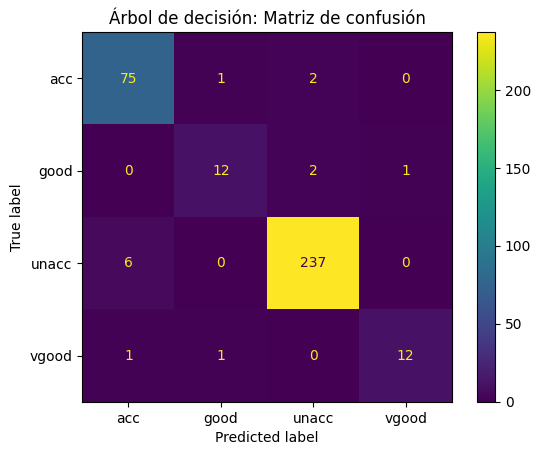

In [12]:
#La matriz de confusión es una tabla que muestra las predicciones correctas e incorrectas para cada clase
cmDT=confusion_matrix(Y_test, prediction_y_testDT)
n_classes = cmDT.shape[0]

display = ConfusionMatrixDisplay(confusion_matrix=cmDT, display_labels=decisionTreeModel.classes_)
display.plot()
display.ax_.set_title("Árbol de decisión: Matriz de confusión")
pyplot.show()


#### Cálculo de métricas

In [13]:

decisionTreeScore = accuracy_score(Y_test, prediction_y_testDT)

print('La precisión del modelo es de ',decisionTreeScore)
inst_corrDT=0
for i in range (n_classes):
    inst_corrDT+=cmDT[i,i]
    
print('El árbol de decisión clasifica correctamente ', inst_corrDT,  'instancias de', len(Y_test),', lo que quiere decir que el ' , decisionTreeScore*100, '% son clasificadas correctamente')

La precisión del modelo es de  0.96
El árbol de decisión clasifica correctamente  336 instancias de 350 , lo que quiere decir que el  96.0 % son clasificadas correctamente


In [14]:
inst_incorrDT=0
for i in range (n_classes):
    inst_incorrDT+=np.sum(cmDT[:,i])-cmDT[i,i]

print('El árbol de decisión clasifica incorrectamente ', inst_incorrDT, 'instancias, lo que quiere decir que el ' , 100-decisionTreeScore*100, '% de las instancias han sido clasificadas incorrectamente')

El árbol de decisión clasifica incorrectamente  14 instancias, lo que quiere decir que el  4.0 % de las instancias han sido clasificadas incorrectamente


In [15]:
#ACC RATES
tp_acc = cmDT[0, 0]
tn_acc = cmDT[1, 1] + cmDT[2, 1] + cmDT[3, 1] + cmDT[1, 2] + cmDT[2, 2] + cmDT[3, 2] + cmDT[1, 3] + cmDT[2, 3] + cmDT[3, 3]
fp_acc = cmDT[1, 0] + cmDT[2, 0] + cmDT[3, 0]
fn_acc = cmDT[0, 1] + cmDT[0, 2] + cmDT[0, 3]

precision_acc = tp_acc / (tp_acc + fp_acc)
TPR_acc = tp_acc / (tp_acc + fn_acc)
FPR_acc = fp_acc / ( fp_acc + tn_acc)

#UNACC RATES
tp_unacc = cmDT[2, 2]
tn_unacc = cmDT[0, 0] + cmDT[0, 1] + cmDT[0, 3] + cmDT[1, 0] + cmDT[1, 1] + cmDT[1, 3] + cmDT[3, 0] + cmDT[3, 1] + cmDT[3, 3]
fp_unacc = cmDT[0, 2] + cmDT[1, 2] + cmDT[3, 2]
fn_unacc = cmDT[2, 0] + cmDT[2, 1] + cmDT[2, 3]

precision_unacc = tp_unacc / (tp_unacc + fp_unacc)
TPR_unacc = tp_unacc / (tp_unacc + fn_unacc)
FPR_unacc = fp_unacc / ( fp_unacc + tn_unacc)

#GOOD RATES
tp_good = cmDT[1, 1]
tn_good = cmDT[0, 0] + cmDT[2, 0] + cmDT[3, 0] + cmDT[0, 2] + cmDT[2, 2] + cmDT[3, 2] + cmDT[0, 3] + cmDT[2, 3] + cmDT[3, 3]
fp_good = cmDT[0, 1] + cmDT[2, 1] + cmDT[3, 1]
fn_good = cmDT[1, 0] + cmDT[1, 2] + cmDT[1, 3]

precision_good = tp_good / (tp_good + fp_good)
TPR_good = tp_good / (tp_good + fn_good)
FPR_good = fp_good / ( fp_good + tn_good)

#VGOOD RATES
tp_vgood = cmDT[3, 3]
tn_vgood = cmDT[0, 0] + cmDT[0, 1] + cmDT[0, 2] + cmDT[1, 0] + cmDT[1, 1] + cmDT[1, 2] + cmDT[2, 0] + cmDT[2, 1] + cmDT[2, 2]
fp_vgood = cmDT[0, 3] + cmDT[1, 3] + cmDT[2, 3]
fn_vgood = cmDT[3, 0] + cmDT[3, 1] + cmDT[3, 2]

precision_vgood = tp_vgood / (tp_vgood + fp_vgood)
TPR_vgood = tp_vgood / (tp_vgood + fn_vgood)
FPR_vgood = fp_vgood / ( fp_vgood + tn_vgood)

print('ACC RATES')
print('TPR: ',TPR_acc.round(3) )
print('FPR: ',FPR_acc.round(3))
print('\n')

print('UNACC RATES')
print('TPR: ',TPR_unacc.round(3))
print('FPR: ',FPR_unacc.round(3))
print('\n')

print('GOOD')
print('TPR: ',TPR_good.round(3))
print('FPR: ',FPR_good.round(3))
print('\n')

print('VGOOD RATES')
print('TPR: ',TPR_vgood.round(3))
print('FPR: ',FPR_vgood.round(3))
print('\n')

ACC RATES
TPR:  0.962
FPR:  0.026


UNACC RATES
TPR:  0.975
FPR:  0.037


GOOD
TPR:  0.8
FPR:  0.006


VGOOD RATES
TPR:  0.857
FPR:  0.003




Observando que la precisión del modelo es 0.960 y que los True Positive Rates son superiores a 0,800 (0.962, 0.975, 0.800 y 0.857 en acc, unacc, good y vgood, respectivamente), así como los False Positive Rates son inferiores a 0.04 (0.026, 0.037, 0.006 y 0.003), podemos asegurar que el modelo generado por random forest se ajusta bien a los datos, permitiéndonos poder predecir resultados de forma eficaz.

### MODELO 2 Random Forest

In [16]:
#Predicción Conjunto de prueba y Conjunto de Validacion

prediction_y_testRF = randomForestModel.predict(X_test)

prediction_y_validationRF = randomForestModel.predict(X_validation)

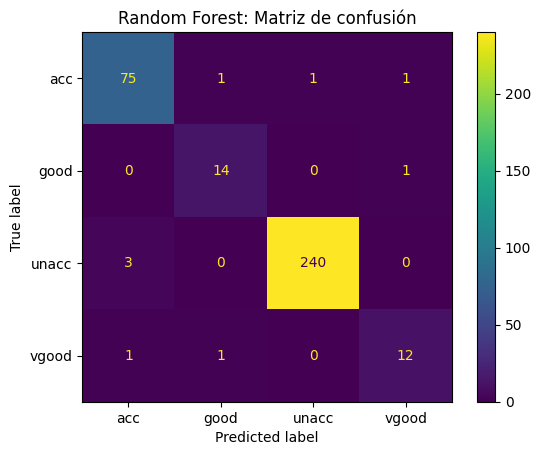

In [17]:
#La matriz de confusión es una tabla que muestra las predicciones correctas e incorrectas para cada clase
cmRF= confusion_matrix(Y_test, prediction_y_testRF, labels=randomForestModel.classes_)
n_classes = cmRF.shape[0]
display = ConfusionMatrixDisplay(confusion_matrix=cmRF, display_labels=decisionTreeModel.classes_)
display.plot()
display.ax_.set_title("Random Forest: Matriz de confusión")
pyplot.show()


#### Cálculo de métricas

In [18]:

randomForestScore = round(accuracy_score(Y_test, prediction_y_testRF),3)

print('La precisión del modelo es de ',randomForestScore)
inst_corrRF=0
for i in range (n_classes):
    inst_corrRF+=cmRF[i,i]
    
print('El random forest clasifica correctamente ', inst_corrRF,  'instancias de', len(Y_test),', lo que quiere decir que el ' , randomForestScore*100, '% son clasificadas correctamente')

La precisión del modelo es de  0.974
El random forest clasifica correctamente  341 instancias de 350 , lo que quiere decir que el  97.39999999999999 % son clasificadas correctamente


In [19]:
inst_incorrRF=0
for i in range (n_classes):
    inst_incorrRF+=np.sum(cmRF[:,i])-cmRF[i,i]

print('El random forest clasifica incorrectamente ', inst_incorrRF, 'instancias, lo que quiere decir que el ' , round(100-randomForestScore*100,3), '% de las instancias han sido clasificadas incorrectamente')

El random forest clasifica incorrectamente  9 instancias, lo que quiere decir que el  2.6 % de las instancias han sido clasificadas incorrectamente


In [20]:
#ACC RATES
tp_accRF = cmRF[0, 0]
tn_accRF = cmRF[1, 1] + cmRF[2, 1] + cmRF[3, 1] + cmRF[1, 2] + cmRF[2, 2] + cmRF[3, 2] + cmRF[1, 3] + cmRF[2, 3] + cmRF[3, 3]
fp_accRF = cmRF[1, 0] + cmRF[2, 0] + cmRF[3, 0]
fn_accRF = cmRF[0, 1] + cmRF[0, 2] + cmRF[0, 3]

precision_accRF = tp_accRF / (tp_accRF + fp_accRF)
TPR_accRF = tp_accRF / (tp_accRF + fn_accRF)
FPR_accRF = fp_accRF / ( fp_accRF + tn_accRF)

#UNACC RATES
tp_unaccRF = cmRF[2, 2]
tn_unaccRF = cmRF[0, 0] + cmRF[0, 1] + cmRF[0, 3] + cmRF[1, 0] + cmRF[1, 1] + cmRF[1, 3] + cmRF[3, 0] + cmRF[3, 1] + cmRF[3, 3]
fp_unaccRF = cmRF[0, 2] + cmRF[1, 2] + cmRF[3, 2]
fn_unaccRF = cmRF[2, 0] + cmRF[2, 1] + cmRF[2, 3]

precision_unaccRF = tp_unaccRF / (tp_unaccRF + fp_unaccRF)
TPR_unaccRF = tp_unaccRF / (tp_unaccRF + fn_unaccRF)
FPR_unaccRF = fp_unaccRF / ( fp_unaccRF + tn_unaccRF)

#GOOD RATES
tp_goodRF = cmRF[1, 1]
tn_goodRF = cmRF[0, 0] + cmRF[2, 0] + cmRF[3, 0] + cmRF[0, 2] + cmRF[2, 2] + cmRF[3, 2] + cmRF[0, 3] + cmRF[2, 3] + cmRF[3, 3]
fp_goodRF = cmRF[0, 1] + cmRF[2, 1] + cmRF[3, 1]
fn_goodRF = cmRF[1, 0] + cmRF[1, 2] + cmRF[1, 3]

precision_goodRF = tp_goodRF / (tp_goodRF + fp_goodRF)
TPR_goodRF = tp_goodRF / (tp_goodRF + fn_goodRF)
FPR_goodRF = fp_goodRF / ( fp_goodRF + tn_goodRF)

#VGOOD RATES
tp_vgoodRF = cmRF[3, 3]
tn_vgoodRF = cmRF[0, 0] + cmRF[0, 1] + cmRF[0, 2] + cmRF[1, 0] + cmRF[1, 1] + cmRF[1, 2] + cmRF[2, 0] + cmRF[2, 1] + cmRF[2, 2]
fp_vgoodRF = cmRF[0, 3] + cmRF[1, 3] + cmRF[2, 3]
fn_vgoodRF = cmRF[3, 0] + cmRF[3, 1] + cmRF[3, 2]

precision_vgoodRF = tp_vgoodRF / (tp_vgoodRF + fp_vgoodRF)
TPR_vgoodRF = tp_vgoodRF / (tp_vgoodRF + fn_vgoodRF)
FPR_vgoodRF = fp_vgoodRF / ( fp_vgoodRF + tn_vgoodRF)

print('ACC RATES')
print('TPR: ',TPR_accRF.round(3) )
print('FPR: ',FPR_accRF.round(3))
print('\n')

print('UNACC RATES')
print('TPR: ',TPR_unaccRF.round(3))
print('FPR: ',FPR_unaccRF.round(3))
print('\n')

print('GOOD RATES')
print('TPR: ',TPR_goodRF.round(3))
print('FPR: ',FPR_goodRF.round(3))
print('\n')

print('VGOOD RATES')
print('TPR: ',TPR_vgoodRF.round(3))
print('FPR: ',FPR_vgoodRF.round(3))
print('\n')

ACC RATES
TPR:  0.962
FPR:  0.015


UNACC RATES
TPR:  0.988
FPR:  0.009


GOOD RATES
TPR:  0.933
FPR:  0.006


VGOOD RATES
TPR:  0.857
FPR:  0.006




Observando que la precisión del modelo es 0.974 y que los True Positive Rates son superiores a 0,85 (0.962, 0.988, 0.933 y 0.857 en acc, unacc, good y vgood, respectivamente), así como los False Positive Rates son inferiores a 0.025 (0.022, 0.019, 0.003 y 0.003), podemos asegurar que el modelo generado por random forest se ajusta bien a los datos, permitiéndonos poder predecir resultados de forma eficaz.

Comparando estas métricas entre ambos modelos , podemos ver que la precisión de este modelo y los TPR son mayores, así como menor el FPR, lo que sugiere que el RF se ajusta mejor a los datos y permite hacer mejores predicciones. Sin embargo, en el siguiente punto corroboraremos la afirmación.

## Comparación del desempeño de modelos

### Métricas Tabla

Las principales métricas de evaluación del rendimiento del modelo mostradas son:
- **precision**: Proporción de predicciones correctas entre las realizadas para una clase.
- **recall**: Proporción de verdaderos positivos detectados entre todos los casos positivos.
- **f1-score**: Media armónica de la precision y el recall. Útil para evaluar modelos con clases desbalanceadas.
- **support**: número de instancias reales de cada clase presentes en el conjunto de datos de prueba.
- **accuracy**: Proporción de predicciones correctas que hizo el modelo sobre el total de instancias del conjunto de datos.
- **macro avg**: Media aritmética de las medidas de rendimiento para cada clase en el conjunto de datos sin tener en cuenta el soporte de cada clase.
- **weighted avg**: Media aritmética de las medidas de rendimiento para cada clase en el conjunto de datos teniendo en cuenta el soporte de cada clase.

In [21]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla
reporte_clasificacionDT = classification_report(Y_test, prediction_y_testDT)
print('REPORTE CLASIFICACION DECISION TREE')
print(reporte_clasificacionDT)
print('\n')

# Se imprime el reporte de clasificación para evaluar el rendimiento del modelo con varias métricas

reporte_clasificacionRF = classification_report(Y_test, prediction_y_testRF)
print('REPORTE CLASIFICACION RANDOM FOREST')
print(reporte_clasificacionRF)
print('\n')

REPORTE CLASIFICACION DECISION TREE
              precision    recall  f1-score   support

         acc       0.91      0.96      0.94        78
        good       0.86      0.80      0.83        15
       unacc       0.98      0.98      0.98       243
       vgood       0.92      0.86      0.89        14

    accuracy                           0.96       350
   macro avg       0.92      0.90      0.91       350
weighted avg       0.96      0.96      0.96       350



REPORTE CLASIFICACION RANDOM FOREST
              precision    recall  f1-score   support

         acc       0.95      0.96      0.96        78
        good       0.88      0.93      0.90        15
       unacc       1.00      0.99      0.99       243
       vgood       0.86      0.86      0.86        14

    accuracy                           0.97       350
   macro avg       0.92      0.93      0.93       350
weighted avg       0.97      0.97      0.97       350





Basándonos en los valores que se obtienen en las distintas métricas, podemos ver que Random Forest obtiene mayores valores en casi todos los parámetros, lo que nos sugiere de forma clara que es mejor modelo que Decision Tree

###  Validación Cruzada

La validación cruzada permite estimar el ajuste del modelo a un hipotético conjunto de datos de prueba cuando no se dispone de este conjunto de datos de prueba de manera explícita. Consiste en dividir el conjunto de ejemplos disponibles en un conjunto de datos de entrenamiento y un conjunto de datos de validación:
   - **Datos de entrenamiento**: se utilizan para generar el árbol.
   - **Datos de validación**: se utilizan para validar la precisión del árbol generado sobre mejorar la precisión de la clasificación datos futuros.

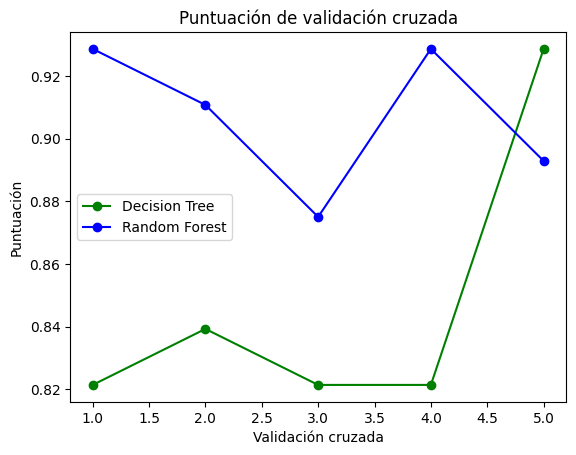

In [22]:
# Gráfica de validación cruzada para la comparación de modelos

desempeno_DT = cross_val_score(decisionTreeModel, X_validation, Y_validation, cv=5)
desempeno_RF = cross_val_score(randomForestModel, X_validation, Y_validation, cv=5)

ymin = min(min(desempeno_DT), min(desempeno_RF))
ymax = max(max(desempeno_DT), max(desempeno_RF))


pyplot.plot(range(1, 6), desempeno_DT, label="Decision Tree", linestyle='solid', marker='o', color='green')
pyplot.plot(range(1, 6), desempeno_RF, label="Random Forest", linestyle='solid', marker='o', color='blue')


pyplot.xlabel("Validación cruzada")
pyplot.ylabel("Puntuación")
pyplot.title('Puntuación de validación cruzada')

pyplot.legend()
pyplot.show()

Se puede ver que, independientemente de las métricas o las tablas, RandomForest aporta mejores resultados. Además, en la puntuación de la validación cruzada, se puede ver que la puntuación de Random Forest es más estable que la del árbol de decisión, mencionando que en lineas generales la puntuación es también superior independientemente del numero de iteraciones.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

En conclusión, según las métricas que hemos obtenido, Random Forest es un modelo que se adapta mejor a los datos que el árbol de decisión. Ambos modelos podrían mejorarse si pudiéramos conocer la importancia de cada variable de entrada para la evaluación del coche (editando el peso de cada clase en el árbol en el caso de Decision Tree o eliminándolas en caso de no tener importancia en cualquiera de los dos casos), disminuir el número máximo de nodos para evitar sobreajustes (con el riesgo de que se pueda perder precisión en el proceso). En el caso específico de Decision Tree, se podría cambiar la función del índice de Gini (cantidad de información) por entropía (homogeneidadad) para evaluar si este ajuste mejora el desempeño del modelo. En el caso de Random Forest, aumentar el número de árboles podría mejorar el desempeño del modelo, aunque esto incrementaría el tiempo necesario para el entrenamiento. 

El modelo Decision Tree presenta varias ventajas como su facilidad de interpretación, ya que permite visualizar el proceso de toma de decisiones de forma clara y comprensible; ser rápido de entrenar, ser capaz de manejar tanto variables categóricas como numéricas. Sin embargo, también cuenta con limitaciones importantes, como tendencia al sobreajuste (motivo por el que se limita la profundidad del árbol o se aplican técnicas de poda. En contraste, Random Forest reduce de manera considerable el riesgo de sobreajuste gracias a la combinación y promedio de múltiples árboles de decisión. No obstante, también presenta ciertas desventajas, como un mayor costo computacional en comparación con Decision Tree, lo que resulta en tiempos más prolongados tanto para el entrenamiento como para la predicción. Además, es un modelo menos interpretable debido a la complejidad que existe en la combinación de múltiples árboles de decisión.

Luego, si lo que buscamos es precisión en las predicciones y un mejor ajuste a los datos, deberemos escoger random forest. Sin embargo, si lo que buscamos es interpretabilidad o el número de datos no es excesivamente grande, el árbol de decisión resulta en una mejor elección.